In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('/Users/dhaneshramesh/Downloads/abalone/abalone.data')

In [11]:
data.columns = [
    "Sex", "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight", "VisceraWeight",
    "ShellWeight", "Rings"
]
print(data.head())

  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
1   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
2   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
3   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   
4   I   0.425     0.300   0.095       0.3515         0.1410         0.0775   

   ShellWeight  Rings  
0        0.070      7  
1        0.210      9  
2        0.155     10  
3        0.055      7  
4        0.120      8  


In [32]:
print(data.info())
print("-----------------------------------------------")
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4176 non-null   object 
 1   Length         4176 non-null   float64
 2   Diameter       4176 non-null   float64
 3   Height         4176 non-null   float64
 4   WholeWeight    4176 non-null   float64
 5   ShuckedWeight  4176 non-null   float64
 6   VisceraWeight  4176 non-null   float64
 7   ShellWeight    4176 non-null   float64
 8   Rings          4176 non-null   int64  
 9   AgeClass       4176 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.4+ KB
None
-----------------------------------------------


(4176, 10)

In [22]:
def assign_age_class(rings):
    if rings <= 7:
        return 1
    elif 8 <= rings <= 10:
        return 2
    elif 11 <= rings <= 15:
        return 3
    else:
        return 4

data['AgeClass'] = data['Rings'].apply(assign_age_class)

data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,AgeClass
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,2



Class Distribution:
 AgeClass
1     839
2    1891
3    1185
4     261
Name: count, dtype: int64


/var/folders/zg/9fz7fg613hnfnnywxqptd1780000gn/T/ipykernel_66196/1540866314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")


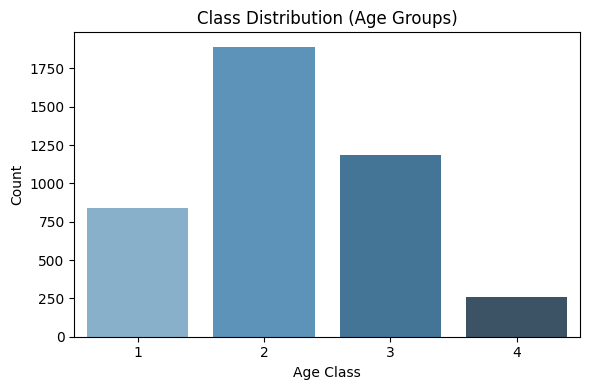

In [23]:
class_counts = data["AgeClass"].value_counts().sort_index()
print("\nClass Distribution:\n", class_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues_d")
plt.title("Class Distribution (Age Groups)")
plt.xlabel("Age Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/var/folders/zg/9fz7fg613hnfnnywxqptd1780000gn/T/ipykernel_66196/472454183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeClass", y=feature, data=data, palette="coolwarm")


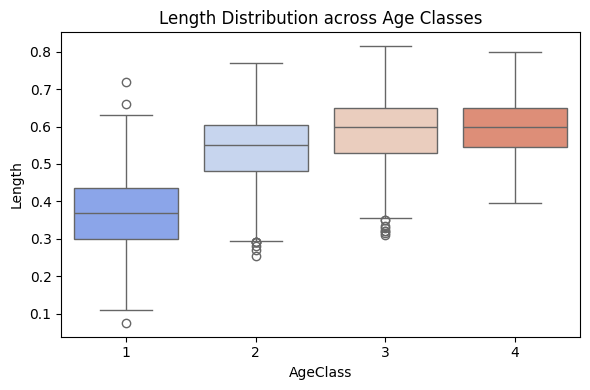

/var/folders/zg/9fz7fg613hnfnnywxqptd1780000gn/T/ipykernel_66196/472454183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeClass", y=feature, data=data, palette="coolwarm")


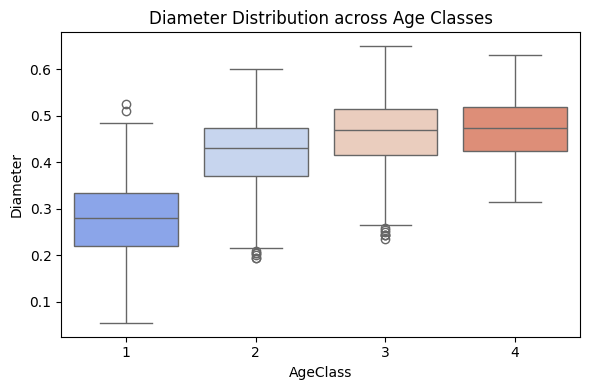

/var/folders/zg/9fz7fg613hnfnnywxqptd1780000gn/T/ipykernel_66196/472454183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeClass", y=feature, data=data, palette="coolwarm")


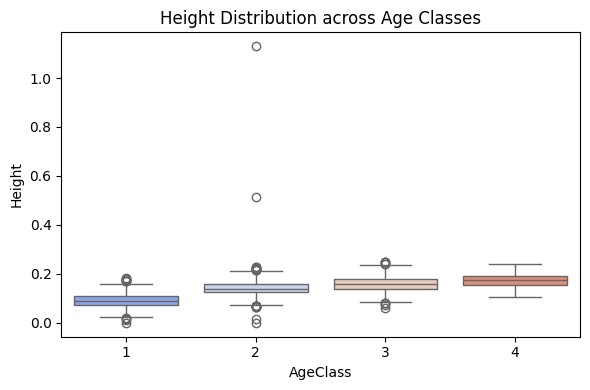

/var/folders/zg/9fz7fg613hnfnnywxqptd1780000gn/T/ipykernel_66196/472454183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeClass", y=feature, data=data, palette="coolwarm")


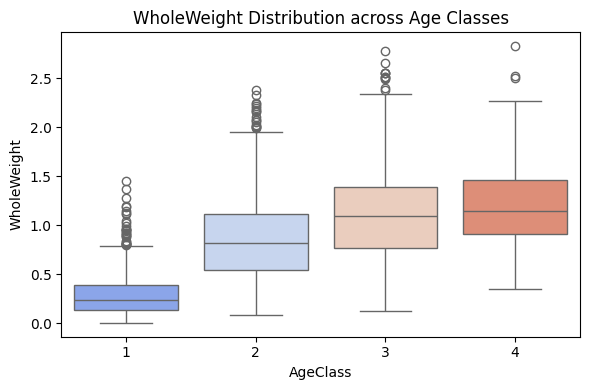

/var/folders/zg/9fz7fg613hnfnnywxqptd1780000gn/T/ipykernel_66196/472454183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AgeClass", y=feature, data=data, palette="coolwarm")


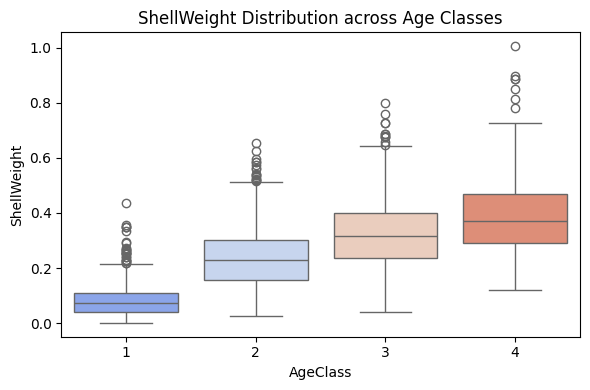

In [25]:
numeric_features = ["Length", "Diameter", "Height", "WholeWeight", "ShellWeight"]

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="AgeClass", y=feature, data=data, palette="coolwarm")
    plt.title(f"{feature} Distribution across Age Classes")
    plt.tight_layout()
    plt.show()

In [26]:
abalone_encoded = data.copy()
abalone_encoded = pd.get_dummies(abalone_encoded, columns=["Sex"], drop_first=True)

features = [
    "Length", "Diameter", "Height",
    "WholeWeight", "ShuckedWeight", "VisceraWeight",
    "ShellWeight", "Sex_I", "Sex_M"
]

X = abalone_encoded[features]
y = abalone_encoded["AgeClass"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio:", np.round(pca.explained_variance_ratio_, 3))
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["AgeClass"] = y.values


Explained Variance Ratio: [0.757 0.127]
Total Variance Explained: 0.884299467046507


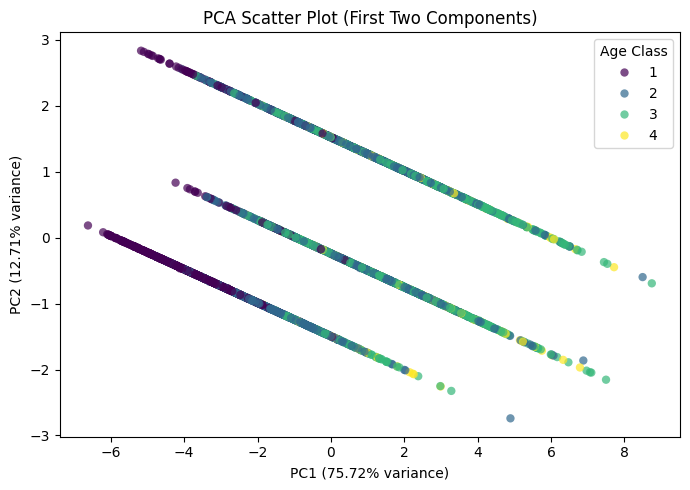

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="AgeClass",
    palette="viridis",
    alpha=0.7,
    edgecolor="none"
)
plt.title("PCA Scatter Plot (First Two Components)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend(title="Age Class")
plt.tight_layout()
plt.show()

In [30]:
summary = data.groupby("AgeClass")[numeric_features].describe().round(2)
print("\nFeature Summary Statistics by Age Class:\n", summary)


Feature Summary Statistics by Age Class:
           Length                                           Diameter        \
           count  mean   std   min   25%   50%   75%   max    count  mean   
AgeClass                                                                    
1          839.0  0.37  0.10  0.08  0.30  0.37  0.44  0.72    839.0  0.28   
2         1891.0  0.54  0.09  0.26  0.48  0.55  0.60  0.77   1891.0  0.42   
3         1185.0  0.59  0.09  0.31  0.53  0.60  0.65  0.82   1185.0  0.46   
4          261.0  0.60  0.07  0.40  0.55  0.60  0.65  0.80    261.0  0.47   

          ... WholeWeight       ShellWeight                                \
          ...         75%   max       count  mean   std   min   25%   50%   
AgeClass  ...                                                               
1         ...        0.39  1.44       839.0  0.08  0.06  0.00  0.04  0.07   
2         ...        1.11  2.38      1891.0  0.23  0.10  0.03  0.16  0.23   
3         ...        1.39  2.78 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
X = abalone_encoded[features]     # (same features as PCA step)
y = abalone_encoded["AgeClass"]
results = []


In [36]:
depths = [3, 5, 7, 9, None]
min_samples = [2, 5, 10]

experiment = 1
for depth in depths:
    for min_leaf in min_samples:
        for seed in range(5):  # 5 random splits
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=seed, stratify=y
            )

            clf = DecisionTreeClassifier(
                criterion="gini",
                max_depth=depth,
                min_samples_leaf=min_leaf,
                random_state=seed
            )

            clf.fit(X_train, y_train)
            y_pred_train = clf.predict(X_train)
            y_pred_test = clf.predict(X_test)

            acc_train = accuracy_score(y_train, y_pred_train)
            acc_test = accuracy_score(y_test, y_pred_test)
            f1_train = f1_score(y_train, y_pred_train, average="macro")
            f1_test = f1_score(y_test, y_pred_test, average="macro")

            results.append({
                "Exp": experiment,
                "Depth": depth,
                "MinLeaf": min_leaf,
                "Seed": seed,
                "Train_Acc": acc_train,
                "Test_Acc": acc_test,
                "Train_F1": f1_train,
                "Test_F1": f1_test
            })
            experiment += 1

results_df = pd.DataFrame(results)
print("✅ Completed Multiple Runs")
print(results_df.head())

✅ Completed Multiple Runs
   Exp  Depth  MinLeaf  Seed  Train_Acc  Test_Acc  Train_F1   Test_F1
0    1    3.0        2     0   0.619569  0.608140  0.485633  0.478500
1    2    3.0        2     1   0.597332  0.598563  0.477496  0.478904
2    3    3.0        2     2   0.619911  0.604948  0.487716  0.471824
3    4    3.0        2     3   0.612385  0.622506  0.482006  0.485051
4    5    3.0        2     4   0.616832  0.623304  0.468359  0.475208


In [38]:
summary = results_df.groupby(["Depth", "MinLeaf"])[["Test_Acc", "Test_F1"]].mean().reset_index()
best_row = summary.sort_values(by="Test_F1", ascending=False).iloc[0]
best_depth = best_row["Depth"]
best_minleaf = best_row["MinLeaf"]

print("\n📊 Mean Test Performance Summary (by Hyperparameters):")
print(summary.sort_values(by="Test_F1", ascending=False).head())

print(f"\nBest Model Parameters: max_depth={best_depth}, min_samples_leaf={best_minleaf}")



📊 Mean Test Performance Summary (by Hyperparameters):
    Depth  MinLeaf  Test_Acc   Test_F1
8     7.0       10  0.614366  0.552628
11    9.0       10  0.605906  0.549514
6     7.0        2  0.613567  0.537677
7     7.0        5  0.611492  0.536547
3     5.0        2  0.623623  0.532308

Best Model Parameters: max_depth=7.0, min_samples_leaf=10.0


In [41]:
# Step 11 (fixed): Summarise and Find Best Performing Model
summary = results_df.groupby(["Depth", "MinLeaf"])[["Test_Acc", "Test_F1"]].mean().reset_index()
best_row = summary.sort_values(by="Test_F1", ascending=False).iloc[0]

# Convert float to int safely
best_depth = None if pd.isna(best_row["Depth"]) else int(best_row["Depth"])
best_minleaf = int(best_row["MinLeaf"])

print("\nMean Test Performance Summary (by Hyperparameters):")
print(summary.sort_values(by="Test_F1", ascending=False).head())

print(f"\nBest Model Parameters: max_depth={best_depth}, min_samples_leaf={best_minleaf}")

# Step 12: Train Final Model on Full Training Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

best_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=best_depth,
    min_samples_leaf=best_minleaf,
    random_state=42
)
best_clf.fit(X_train, y_train)



Mean Test Performance Summary (by Hyperparameters):
    Depth  MinLeaf  Test_Acc   Test_F1
8     7.0       10  0.614366  0.552628
11    9.0       10  0.605906  0.549514
6     7.0        2  0.613567  0.537677
7     7.0        5  0.611492  0.536547
3     5.0        2  0.623623  0.532308

Best Model Parameters: max_depth=7, min_samples_leaf=10


,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


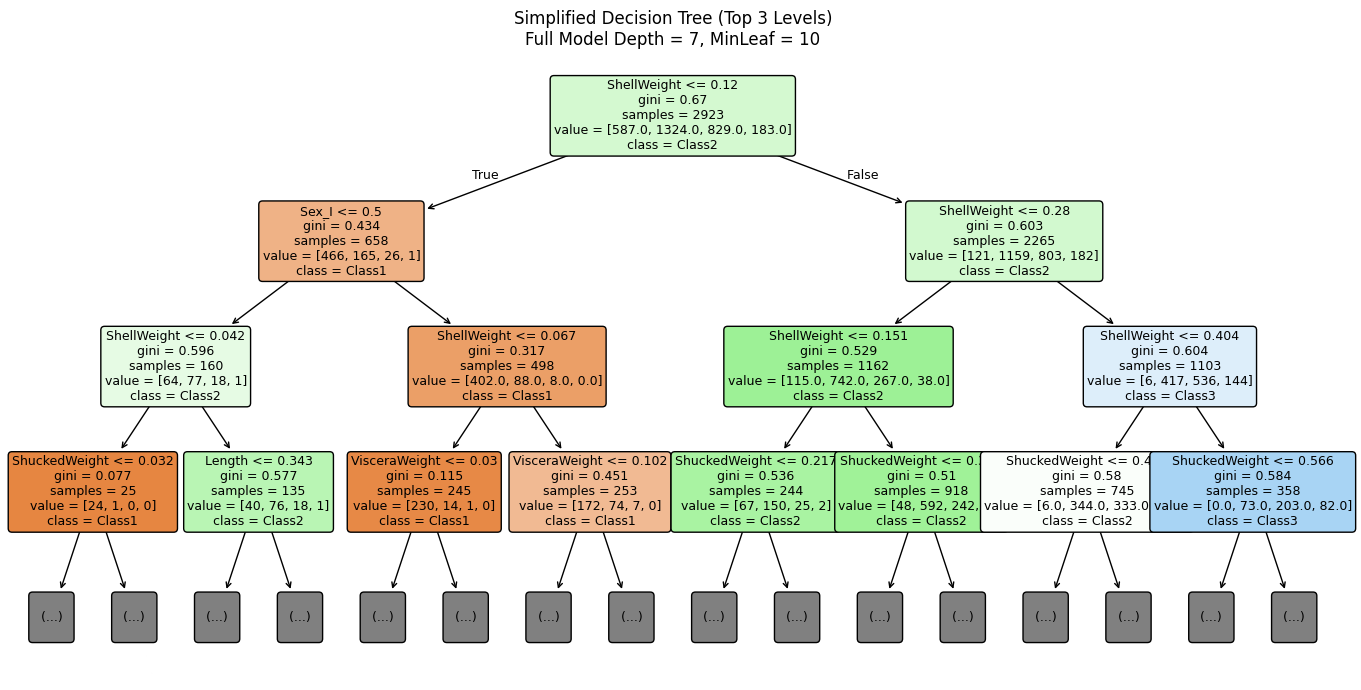

In [44]:
# ==============================================================
# STEP 13 (Visualization Only): Simplified Decision Tree for Report
# ==============================================================

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# Plot only the top 3 levels of your best Decision Tree
# --------------------------------------------------------------
plt.figure(figsize=(14, 7))
plot_tree(
    best_clf,
    feature_names=features,
    class_names=["Class1", "Class2", "Class3", "Class4"],
    filled=True,
    rounded=True,
    fontsize=9,
    max_depth=3      # 👈 Show only top 3 levels (clear and interpretable)
)
plt.title(
    f"Simplified Decision Tree (Top 3 Levels)\n"
    f"Full Model Depth = {best_clf.get_depth()}, MinLeaf = {best_clf.min_samples_leaf}",
    fontsize=12
)
plt.tight_layout()
plt.savefig("abalone_tree_top3levels.png", dpi=300, bbox_inches="tight")
plt.show()


Number of candidate α values: 57


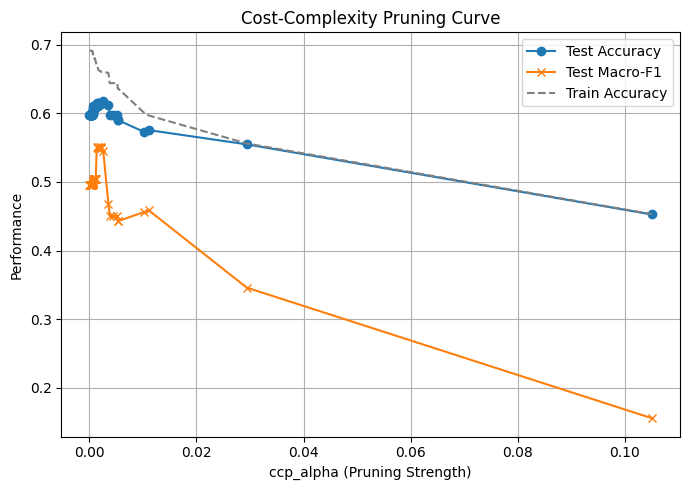

🏆 Best α (max test F1): 0.001382

📊 Comparison of Original vs Pruned Tree:
Original Tree Nodes : 153
Pruned Tree Nodes   : 43
Original Test Acc    : 0.597
Pruned Test Acc      : 0.615
Original Macro-F1    : 0.496
Pruned Macro-F1      : 0.551


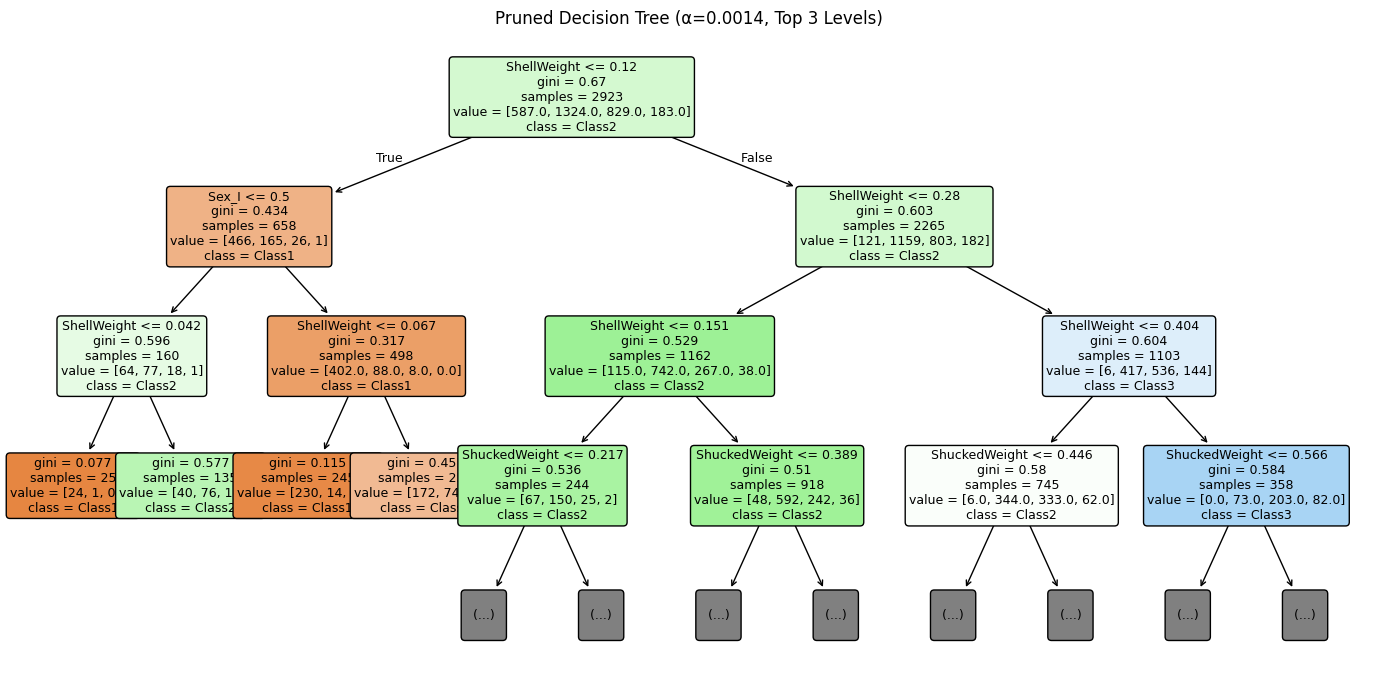

In [45]:
# ==============================================================
# STEP 14: Pruning Investigation – Cost-Complexity Post-Pruning
# ==============================================================

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --------------------------------------------------------------
# Step 1: Split again (same as before to stay consistent)
# --------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --------------------------------------------------------------
# Step 2: Get cost-complexity pruning path (α values)
# --------------------------------------------------------------
path = best_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(f"Number of candidate α values: {len(ccp_alphas)}")

# --------------------------------------------------------------
# Step 3: Train models for each α and record performance
# --------------------------------------------------------------
train_acc, test_acc, train_f1, test_f1 = [], [], [], []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        criterion="gini",
        random_state=42,
        ccp_alpha=alpha,
        max_depth=best_depth,
        min_samples_leaf=best_minleaf
    )
    clf.fit(X_train, y_train)

    y_tr, y_te = clf.predict(X_train), clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, y_tr))
    test_acc.append(accuracy_score(y_test, y_te))
    train_f1.append(f1_score(y_train, y_tr, average="macro"))
    test_f1.append(f1_score(y_test, y_te, average="macro"))

# --------------------------------------------------------------
# Step 4: Plot α vs Accuracy / F1
# --------------------------------------------------------------
plt.figure(figsize=(7, 5))
plt.plot(ccp_alphas, test_acc, marker='o', label='Test Accuracy')
plt.plot(ccp_alphas, test_f1, marker='x', label='Test Macro-F1')
plt.plot(ccp_alphas, train_acc, linestyle='--', color='gray', label='Train Accuracy')
plt.xlabel("ccp_alpha (Pruning Strength)")
plt.ylabel("Performance")
plt.title("Cost-Complexity Pruning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pruning_ccpalpha_curve.png", dpi=300, bbox_inches="tight")
plt.show()

# --------------------------------------------------------------
# Step 5: Select best α (max test F1)
# --------------------------------------------------------------
best_index = np.argmax(test_f1)
best_alpha = ccp_alphas[best_index]
print(f"🏆 Best α (max test F1): {best_alpha:.6f}")

# --------------------------------------------------------------
# Step 6: Retrain pruned tree using best α
# --------------------------------------------------------------
pruned_tree = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    ccp_alpha=best_alpha,
    max_depth=best_depth,
    min_samples_leaf=best_minleaf
)
pruned_tree.fit(X_train, y_train)

# --------------------------------------------------------------
# Step 7: Evaluate pruned tree
# --------------------------------------------------------------
y_pred_pruned = pruned_tree.predict(X_test)
acc_pruned = accuracy_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned, average="macro")

print("\n📊 Comparison of Original vs Pruned Tree:")
print(f"Original Tree Nodes : {best_clf.tree_.node_count}")
print(f"Pruned Tree Nodes   : {pruned_tree.tree_.node_count}")
print(f"Original Test Acc    : {accuracy_score(y_test, best_clf.predict(X_test)):.3f}")
print(f"Pruned Test Acc      : {acc_pruned:.3f}")
print(f"Original Macro-F1    : {f1_score(y_test, best_clf.predict(X_test), average='macro'):.3f}")
print(f"Pruned Macro-F1      : {f1_pruned:.3f}")

# --------------------------------------------------------------
# Step 8: Visualise pruned tree (top 3 levels for report)
# --------------------------------------------------------------
plt.figure(figsize=(14, 7))
plot_tree(
    pruned_tree,
    feature_names=features,
    class_names=["Class1", "Class2", "Class3", "Class4"],
    filled=True,
    rounded=True,
    fontsize=9,
    max_depth=3
)
plt.title(f"Pruned Decision Tree (α={best_alpha:.4f}, Top 3 Levels)")
plt.tight_layout()
plt.savefig("abalone_pruned_tree_top3levels.png", dpi=300, bbox_inches="tight")
plt.show()



📊 Random Forest Results Summary:
   n_estimators  Train_Acc  Test_Acc  Train_F1   Test_F1  FitTime
0            10   0.743414  0.622506  0.665527  0.513993     0.07
1            25   0.747520  0.620112  0.674265  0.508661     0.08
2            50   0.746493  0.626496  0.666314  0.503377     0.10
3           100   0.744783  0.624102  0.661839  0.502576     0.22
4           200   0.743414  0.626496  0.655195  0.503920     0.51
5           300   0.742388  0.627294  0.653245  0.505382     0.78


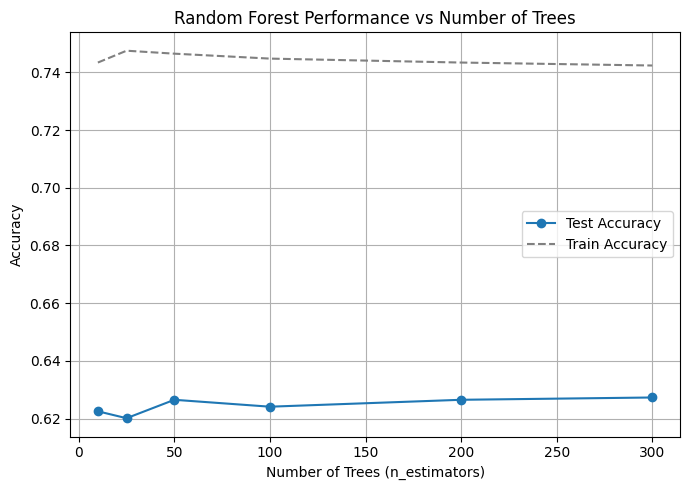

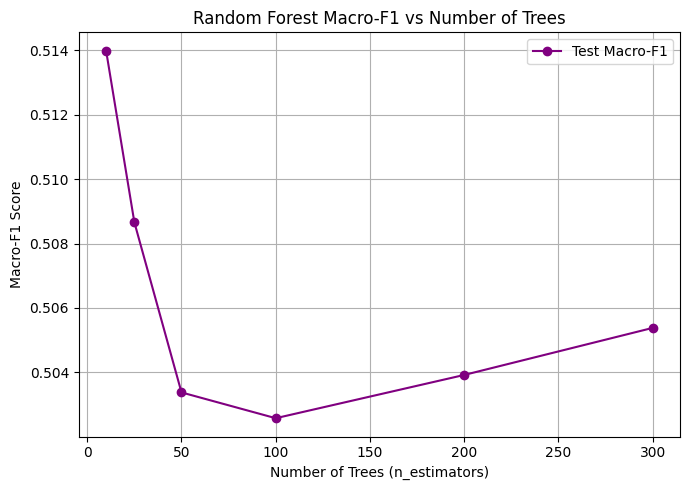


🏆 Best Random Forest uses n_estimators=10.0
Test Accuracy = 0.623, Macro-F1 = 0.514


In [46]:
# ==============================================================
# STEP 15: Random Forest Investigation – Effect of Number of Trees
# ==============================================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# --------------------------------------------------------------
# Step 1: Define different numbers of trees to test
# --------------------------------------------------------------
n_trees = [10, 25, 50, 100, 200, 300]
results_rf = []

# --------------------------------------------------------------
# Step 2: Loop over each number of trees
# --------------------------------------------------------------
for n in n_trees:
    start = time.time()

    rf = RandomForestClassifier(
        n_estimators=n,
        criterion="gini",
        max_depth=None,        # let trees grow fully (bagging helps reduce overfitting)
        min_samples_leaf=best_minleaf,
        random_state=42,
        n_jobs=-1              # use all CPU cores
    )
    rf.fit(X_train, y_train)

    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train, average="macro")
    f1_test = f1_score(y_test, y_pred_test, average="macro")

    elapsed = time.time() - start

    results_rf.append({
        "n_estimators": n,
        "Train_Acc": acc_train,
        "Test_Acc": acc_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "FitTime": round(elapsed, 2)
    })

rf_df = pd.DataFrame(results_rf)
print("\n📊 Random Forest Results Summary:")
print(rf_df)

# --------------------------------------------------------------
# Step 3: Plot number of trees vs performance
# --------------------------------------------------------------
plt.figure(figsize=(7, 5))
plt.plot(rf_df["n_estimators"], rf_df["Test_Acc"], marker='o', label="Test Accuracy")
plt.plot(rf_df["n_estimators"], rf_df["Train_Acc"], linestyle='--', color='gray', label="Train Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Performance vs Number of Trees")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_accuracy_vs_trees.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(rf_df["n_estimators"], rf_df["Test_F1"], marker='o', label="Test Macro-F1", color='purple')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Macro-F1 Score")
plt.title("Random Forest Macro-F1 vs Number of Trees")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rf_f1_vs_trees.png", dpi=300, bbox_inches="tight")
plt.show()

# --------------------------------------------------------------
# Step 4: Identify the best performing Random Forest
# --------------------------------------------------------------
best_rf_row = rf_df.sort_values(by="Test_F1", ascending=False).iloc[0]
best_n = best_rf_row["n_estimators"]
best_rf = RandomForestClassifier(
    n_estimators=int(best_n),
    criterion="gini",
    random_state=42,
    n_jobs=-1
).fit(X_train, y_train)

print(f"\n🏆 Best Random Forest uses n_estimators={best_n}")
print(f"Test Accuracy = {best_rf_row['Test_Acc']:.3f}, Macro-F1 = {best_rf_row['Test_F1']:.3f}")


In [50]:
# ==============================================================
# STEP 16: Gradient Boosting and XGBoost Comparison
# ==============================================================

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# --------------------------------------------------------------
# Step 1 – Initialise model configs
# --------------------------------------------------------------
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=int(best_n),
        criterion="gini",
        random_state=42,
        n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        eval_metric="mlogloss",
        use_label_encoder=False
    )
}

results_gb = []

# --------------------------------------------------------------
# Step 2 – Train, evaluate and record
# --------------------------------------------------------------
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    elapsed = time.time() - start

    results_gb.append({
        "Model": name,
        "Test_Accuracy": acc,
        "Test_MacroF1": f1,
        "Train_Time(s)": round(elapsed, 2)
    })

results_df = pd.DataFrame(results_gb)
print("\n📊 Ensemble Model Comparison Results:")
print(results_df)

# --------------------------------------------------------------
# Step 3 – Plot comparison chart
# --------------------------------------------------------------
plt.figure(figsize=(7,5))
plt.bar(results_df["Model"], results_df["Test_Accuracy"], color=["forestgreen", "goldenrod", "tomato"])
plt.title("Model Comparison – Test Accuracy")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("ensemble_accuracy_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,5))
plt.bar(results_df["Model"], results_df["Test_MacroF1"], color=["darkgreen", "orange", "red"])
plt.title("Model Comparison – Macro-F1 Score")
plt.ylabel("Macro-F1")
plt.tight_layout()
plt.savefig("ensemble_f1_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# --------------------------------------------------------------
# Step 4 – Identify the best ensemble
# --------------------------------------------------------------
best_model_row = results_df.sort_values(by="Test_MacroF1", ascending=False).iloc[0]
best_ensemble_name = best_model_row["Model"]
best_ensemble_f1 = best_model_row["Test_MacroF1"]
print(f"\n🏆 Best Ensemble Model: {best_ensemble_name} (Macro-F1={best_ensemble_f1:.3f})")


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B111F8D5-6AC6-3245-A6B5-94693F6992AB> /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
